# Project15 : 다양한 OCR모델 비교하기


## [루브릭]
1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?  
    목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.  
    
    
2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?  
    평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.  
    
    
3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?  
    최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.  


## [학습 과정]
- 검증용 데이터셋 준비  
- Google OCR API, keras-ocr, Tesseract로 테스트 진행  
- 테스트 결과 정리  
- 결과 분석과 결론 제시  


## [회고]

## Step1. 검증용 데이터셋 준비

In [1]:
# 이미지 준비하기
import os

img_path = os.getenv('HOME') + '/aiffel/ocr_python/file'
img = os.listdir(img_path)
print(img)

['01.jpeg', '06.jpeg', '03.jpeg', '02.jpeg', '04.jpeg', '05.jpeg']


In [2]:
# 현재 디렉토리 변경
os.chdir('./file')
print(os.getcwd())

/aiffel/aiffel/ocr_python/file


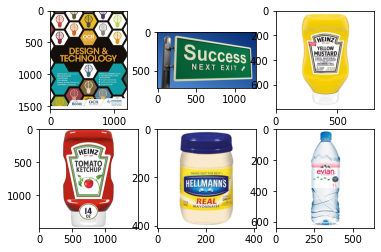

In [3]:
# 이미지 시각화(6장)
import matplotlib.pyplot as plt

for i in range(len(img)):
    plt.subplot(2,3,i+1)
    plt.imshow(plt.imread(img[i]))

## Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행
Google Cloud Vision API 사용

In [4]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [7]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
for i in range(1,7):
    a = '/aiffel/ocr_python/file/'+'0'+str(i)+'.jpeg'
    path = os.getenv('HOME')+a
    print('-'*50,str(i),'jpeg','-'*50)
    detect_text(path)

-rw-r--r-- 1 root root 2334 Feb 24 06:42 /aiffel/aiffel/ocr_python/my_google_api_key.json
-------------------------------------------------- 1 jpeg --------------------------------------------------
Texts:

"OCR
AS/A LEVEL
DESIGN &
TECHNOLOGY
John Grundy (SERIES EDITOR)
Sharon McCarthy
COVERS ALL ENDORSED TITLES
OF THE OCR AS AND A LEVEL
Jacki Piroddi
SPECIFICATIONS:
Chris Walker
• Design Engineering
Simeon Arnold (CONTRIBUTOR)
Fashion and Textiles
John White (CONTRIBUTOR)
Product Design
An OCR endorsed textbook
OCR
G HODDER
EDUCATION
Boost
Oxford Cambridge and RSA
LEARN MORE
"

"OCR"

"AS/A"

"LEVEL"

"DESIGN"

"&"

"TECHNOLOGY"

"John"

"Grundy"

"(SERIES"

"EDITOR)"

"Sharon"

"McCarthy"

"COVERS"

"ALL"

"ENDORSED"

"TITLES"

"OF"

"THE"

"OCR"

"AS"

"AND"

"A"

"LEVEL"

"Jacki"

"Piroddi"

"SPECIFICATIONS:"

"Chris"

"Walker"

"•"

"Design"

"Engineering"

"Simeon"

"Arnold"

"(CONTRIBUTOR)"

"Fashion"

"and"

"Textiles"

"John"

"White"

"(CONTRIBUTOR)"

"Product"

"Design"

"An

In [8]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [11]:
img_array = [plt.imread(i) for i in img]

In [12]:
for i in range(len(img_array)):
    print('{} 인덱스 그림의 크기는: '.format(i), img_array[i].shape)

0 인덱스 그림의 크기는:  (1555, 1200, 3)
1 인덱스 그림의 크기는:  (719, 1278, 3)
2 인덱스 그림의 크기는:  (800, 800, 3)
3 인덱스 그림의 크기는:  (1500, 1500, 3)
4 인덱스 그림의 크기는:  (410, 410, 3)
5 인덱스 그림의 크기는:  (640, 640, 3)


## Step3. 테스트 결과 정리

In [13]:
import cv2 
cv2_img_array = [cv2.imread(i) for i in img]

prediction_groups = [pipeline.recognize([url]) for url in cv2_img_array]

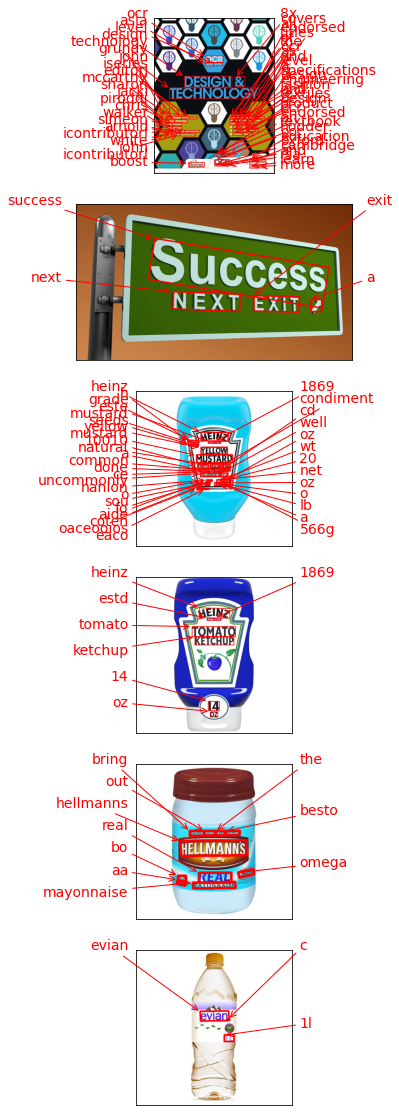

In [14]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(cv2_img_array), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=cv2_img_array[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## Step4. 결론 및 회고

 이번 프로젝트에서는 OCR 기술을 적용한 서비스를 기획해보고 그 서비스와 관련된 이미지 데이터셋에 대해 OCR 기술을 적용해보았다.

 이미지 데이터를 이용하여 시각 장애인을 위한 대신 읽기 서비스를 제안했습니다. 대표적인 OCR 모델인 Google OCR API, keras-ocr을 활용하였고, 서비스에 부합하는 다양한 이미지셋에 대해 성능이 좋은 모델을 찾기 위해 노력했다.
결과적으로 기울어진 및 다닥다닥 붙어있는 크고 작은 상품 등 다양한 이미지를 가장 잘 인식하는 모델은 Google OCR API 라고 생각합니다.